In [2]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution, maplotlib_plot_map as plot_map

In [11]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index)

In [12]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/Downloads/zoe_uk_active_cases_2020-08-18_2020-08-19-18-49.pickle


In [13]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/Downloads/zoe_uk_active_cases_2020-08-17_2020-08-19-09-14.pickle


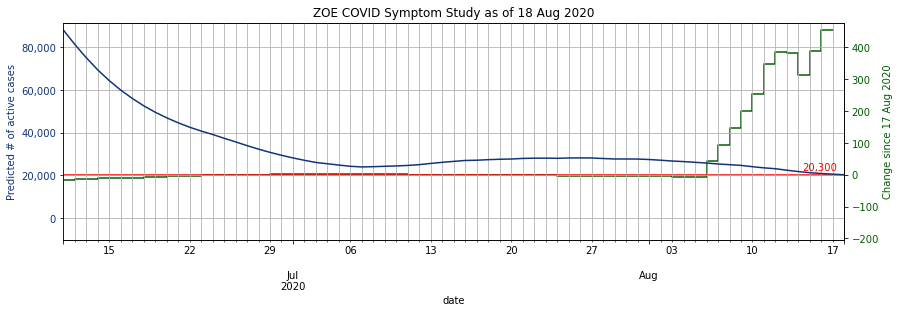

In [14]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

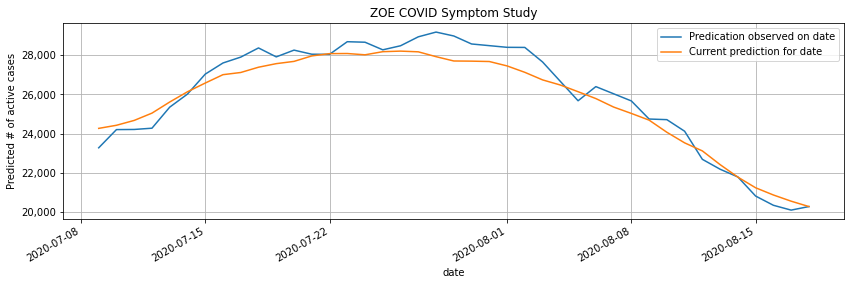

In [15]:
plot_study_evolution(curr_date)

In [16]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [17]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/Downloads/zoe_prevalence_map_2020-08-19_2020-08-19-18-49.pickle


In [18]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
10,Blackpool,E06000009,0.467363
173,Chorley,E07000118,0.320468
7,Halton,E06000006,0.291053
284,Bolton,E08000001,0.287834
322,South Tyneside,E08000023,0.231769
371,Moray,S12000020,0.211452
208,Ashfield,E07000170,0.208780
205,Manchester,E08000003,0.208287
310,Wirral,E08000015,0.201670
180,Preston,E07000123,0.193933


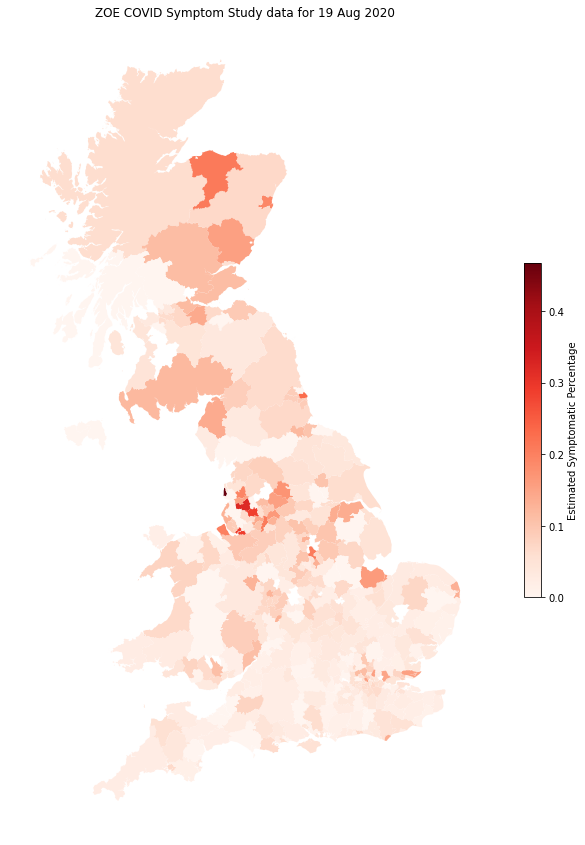

In [3]:
plot_map()